## Logistic Regression

Logistic Regression is a Machine Learning classification algorithm that is used to predict the probability of a categorical   dependent variable. In logistic regression, the dependent variable is a binary variable that contains data coded as 1 (yes,   success, etc.) or 0 (no, failure, etc.). In other words, the logistic regression model predicts P(Y=1) as a function of X.  

In [1]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
data = pd.read_csv("bank.csv")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [3]:
print(data.shape)
print(data.columns)

(45211, 17)
Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


In [4]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue', 'unknown',
       'retired', 'admin', 'services', 'self', 'unemployed', 'housemaid',
       'student'], dtype=object)

In [5]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

### Predict variable (desired output)
#### y — has the client subscribed a term deposit?  (binary: “1”, means “Yes”, “0” means “No”)

In [6]:
data['y'].value_counts()

0    39922
1     5289
Name: y, dtype: int64

## Data Exploration

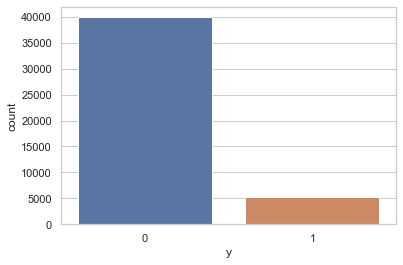

<Figure size 432x288 with 0 Axes>

In [7]:
sns.countplot(x='y',data=data)
plt.show()
plt.savefig("count_plot")

In [8]:
count_zero_sub = len(data[data['y']==0])
count_one_sub  = len(data[data['y']==1])

In [9]:
total = count_one_sub+count_zero_sub
total

45211

In [10]:
pct_zero_sub = (count_zero_sub/ total)*100
print("Percentage of no subscription is ",pct_zero_sub)
pct_one_sub = (count_one_sub/ total)*100
print("Percentage of subscription is ",pct_one_sub)

Percentage of no subscription is  88.30151954170445
Percentage of subscription is  11.698480458295547


## Observation

as in our class in imbalanced, the ratio of no subscription to subscription is 88:11.

In [11]:
data.groupby('y').mean()

,age,balance,day,duration,campaign,pdays,previous
y,,,,,,,
0,40.838986,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
1,41.670070,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


### Observations

The average age of customers who bought the term deposit is higher than the customers who didn't.   
The pdays(days since the customer was last contacted) is greater than the customers who didn't brought.   
The campaigns(number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.

In [12]:
data.groupby('job').mean()

,age,balance,day,duration,campaign,pdays,previous,y
job,,,,,,,,
admin,39.289886,1135.838909,15.564301,246.896732,2.575324,47.859021,0.671630,0.122027
blue,40.044081,1078.826654,15.442561,262.901562,2.816995,44.033498,0.505138,0.072750
entrepreneur,42.190989,1521.470074,15.702085,256.309348,2.799597,32.486214,0.478144,0.082717
housemaid,46.415323,1392.395161,16.002419,245.825000,2.820968,21.505645,0.371774,0.087903
management,40.449567,1763.616832,16.114189,253.995771,2.864348,38.665468,0.668006,0.137556
retired,61.626767,1984.215106,15.439488,287.361307,2.346731,37.443905,0.638693,0.227915
self,40.484484,1647.970868,16.027866,268.157061,2.853072,34.747308,0.551615,0.118429
services,38.740250,997.088108,15.635532,259.318729,2.718344,41.995185,0.501204,0.088830
student,26.542644,1388.060768,14.897655,246.656716,2.299574,57.041578,0.953092,0.286780


In [13]:
data.groupby('education').mean()

,age,balance,day,duration,campaign,pdays,previous,y
education,,,,,,,,
primary,45.865567,1250.949934,15.421398,255.933002,2.834331,36.081740,0.489272,0.086265
secondary,39.964270,1154.880786,15.759159,258.685760,2.700802,42.353504,0.567753,0.105594
tertiary,39.593640,1758.416435,16.086535,258.518532,2.825577,39.024134,0.661980,0.150064
unknown,44.510501,1526.754443,15.810985,257.313947,2.849219,36.856220,0.488422,0.135703


In [14]:
data.groupby('marital').mean()

,age,balance,day,duration,campaign,pdays,previous,y
marital,,,,,,,,
divorced,45.782984,1178.872287,15.796428,262.517188,2.630882,41.001728,0.551373,0.119455
married,43.408099,1425.925590,15.854487,253.412765,2.842875,37.950467,0.556552,0.101235
single,33.703440,1301.497654,15.708210,266.497967,2.649805,44.652385,0.642690,0.149492


## Visualizations

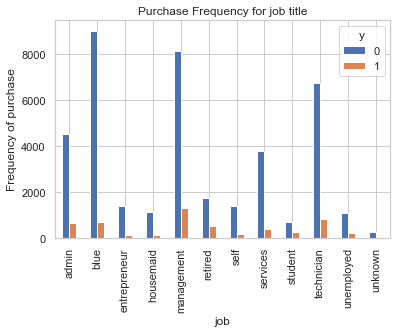

In [15]:
pd.crosstab(data.job,data.y).plot(kind="bar")
plt.title('Purchase Frequency for job title')
plt.xlabel("job")
plt.ylabel("Frequency of purchase")
plt.savefig("purchase_fre_job")

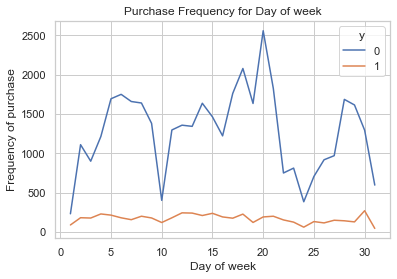

In [16]:
pd.crosstab(data.day,data.y).plot(kind="line")
plt.title('Purchase Frequency for Day of week')
plt.xlabel("Day of week")
plt.ylabel("Frequency of purchase")
plt.savefig("purchase_day_of_week")

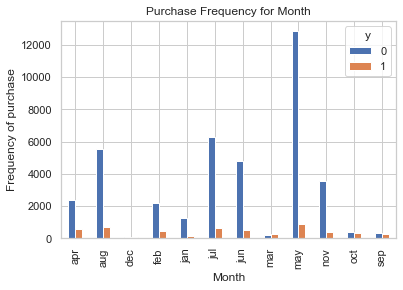

In [17]:
pd.crosstab(data.month,data.y).plot(kind="bar")
plt.title('Purchase Frequency for Month')
plt.xlabel("Month")
plt.ylabel("Frequency of purchase")
plt.savefig("purchase_fre_month")

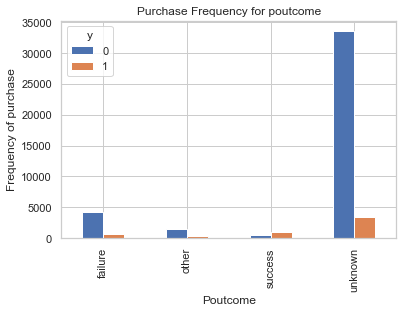

In [18]:
pd.crosstab(data.poutcome,data.y).plot(kind="bar")
plt.title('Purchase Frequency for poutcome')
plt.xlabel("Poutcome")
plt.ylabel("Frequency of purchase")
plt.savefig("purchase_fre_month")

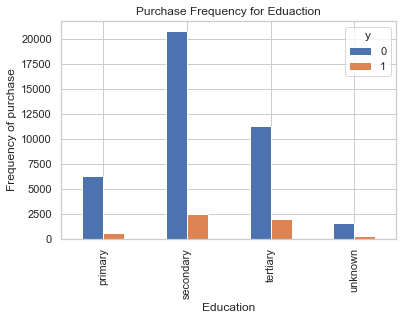

In [19]:
pd.crosstab(data.education,data.y).plot(kind="bar")
plt.title('Purchase Frequency for Eduaction')
plt.xlabel("Education")
plt.ylabel("Frequency of purchase")
plt.savefig("purchase_fre_edu")

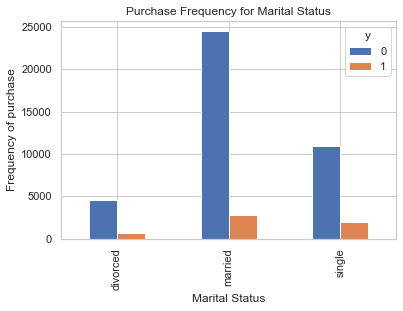

In [20]:
pd.crosstab(data.marital,data.y).plot(kind="bar")
plt.title('Purchase Frequency for Marital Status')
plt.xlabel("Marital Status")
plt.ylabel("Frequency of purchase")
plt.savefig("purchase_fre_Marital_Status")

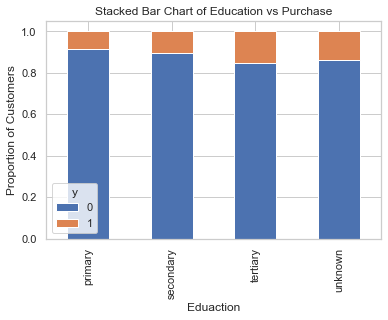

In [21]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs Purchase')
plt.xlabel('Eduaction')
plt.ylabel('Proportion of Customers')
plt.savefig('education_pur_stack')

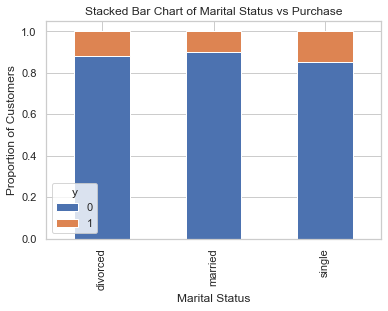

In [22]:
table=pd.crosstab(data.marital,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Purchase')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

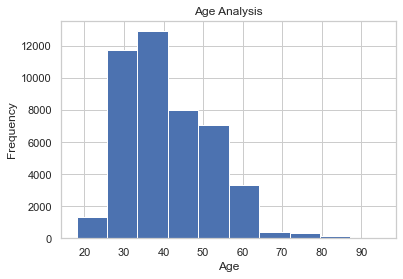

In [23]:
data.age.hist()
plt.title('Age Analysis')
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.savefig("hist_age")

### Observation
- The frequency of purchase of the deposit depends a great deal on the job title.   
- Day of week may not be a good predictor of the outcome.     
- Month might be a good predictor of the outcome variable.    
- Poutcome seems to be a good predictor of the outcome variable.       
- Education seems a good predictor of the outcome variable.     
- The marital status does not seem a strong predictor for the outcome variable.   
- Most of the customers of the bank in this dataset are in the age range of 30–40.    

### Logistic Regression Model Fitting

In [24]:
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  int64 
dtypes: int64(8), object(9)
memory usage: 5.9+ MB


## Label Encoding in Python

In [26]:
from sklearn.preprocessing import LabelEncoder #direct apply
new_data = data.apply(LabelEncoder().fit_transform)
new_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,0


#### using pandas approach

In [ ]:
poutcome_df = pd.DataFrame(data, columns=['poutcome'])
# converting type of columns to 'category'
poutcome_df['poutcome'] = poutcome_df['poutcome'].astype('category')
# Assigning numerical values and storing in another column
poutcome_df['poutcome_Cat'] = poutcome_df['poutcome'].cat.codes
poutcome_df

#### Using sci-kit learn library approach:

In [ ]:
from sklearn.preprocessing import LabelEncoder

pc_df = pd.DataFrame(data, columns=['poutcome'])

# creating instance of labelencoder
ln = LabelEncoder()
# Assigning numerical values and storing in another column
pc_df['pc_Cat'] = ln.fit_transform(pc_df['poutcome'])
pc_df

## One-Hot Encoder
Though label encoding is straight but it has the disadvantage that the numeric values can be misinterpreted by algorithms as   having some sort of hierarchy/order in them. This ordering issue is addressed in another common alternative approach called   ‘One-Hot Encoding’. In this strategy, each category value is converted into a new column and assigned a 1 or 0 (notation for   true/false) value to the column.

Though this approach eliminates the hierarchy/order issues but does have the downside of adding more columns to the data set.   It can cause the number of columns to expand greatly if you have many unique values in a category column. 

#### One-Hot Encoding Using sci-kit learn library approach:

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
oc = OneHotEncoder(handle_unknown='ignore')


# passing poutcome-cat column (label encoded values of poutcome)
pcalls_oc_df = pd.DataFrame(oc.fit_transform(poutcome_df[['poutcome']]).toarray())

# merge with main df bridge_df on key values
poutcome_df = poutcome_df.join(pcalls_oc_df)
poutcome_df

#### Using dummies values approach:
This approach is more flexible because it allows encoding as many category columns as you would like and choose how to label the columns using a prefix. Proper naming will make the rest of the analysis just a little bit easier.

In [ ]:
pcalls_df = pd.DataFrame(data, columns=['poutcome'])
# generate binary values using get_dummies
dum_df = pd.get_dummies(pcalls_df, columns=["poutcome"], prefix=["Type_is"] )
# merge with main df bridge_df on key values
pcalls_df = pcalls_df.join(dum_df)
pcalls_df

## Implementing Logistic Regression

In [ ]:
poutcome_df = pd.DataFrame(data, columns=['poutcome'])
# converting type of columns to 'category'
poutcome_df['poutcome'] = poutcome_df['poutcome'].astype('category')
# Assigning numerical values and storing in another column
poutcome_df['poutcome_Cat'] = poutcome_df['poutcome'].cat.codes
poutcome_df

In [ ]:
month_df = pd.DataFrame(data, columns=['month'])
# converting type of columns to 'category'
month_df['month'] = month_df['month'].astype('category')
# Assigning numerical values and storing in another column
month_df['month_Cat'] = month_df['month'].cat.codes

In [ ]:
education_df = pd.DataFrame(data, columns=['education'])
# converting type of columns to 'category'
education_df['education'] = education_df['education'].astype('category')
# Assigning numerical values and storing in another column
education_df['education_Cat'] = education_df['education'].cat.codes

In [ ]:
contact_df = pd.DataFrame(data, columns=['contact'])
# converting type of columns to 'category'
contact_df['contact'] = contact_df['contact'].astype('category')
# Assigning numerical values and storing in another column
contact_df['econtact_Cat'] = contact_df['contact'].cat.codes

In [ ]:
default_df = pd.DataFrame(data, columns=['default'])
# converting type of columns to 'category'
default_df['default'] = default_df['default'].astype('category')
# Assigning numerical values and storing in another column
default_df['default_Cat'] = default_df['default'].cat.codes

In [ ]:
job_df = pd.DataFrame(data, columns=['job'])
# converting type of columns to 'category'
job_df['job'] = job_df['job'].astype('category')
# Assigning numerical values and storing in another column
job_df['job_Cat'] = job_df['job'].cat.codes

In [ ]:
marital_df = pd.DataFrame(data, columns=['marital'])
# converting type of columns to 'category'
marital_df['marital'] = marital_df['marital'].astype('category')
# Assigning numerical values and storing in another column
marital_df['marital_Cat'] = marital_df['marital'].cat.codes

In [ ]:
education_df = pd.DataFrame(data, columns=['education'])
# converting type of columns to 'category'
education_df['education'] = education_df['education'].astype('category')
# Assigning numerical values and storing in another column
education_df['education_Cat'] = education_df['education'].cat.codes

In [ ]:
housing_df = pd.DataFrame(data, columns=['housing'])
# converting type of columns to 'category'
housing_df['housing'] = housing_df['housing'].astype('category')
# Assigning numerical values and storing in another column
housing_df['housing_Cat'] = housing_df['housing'].cat.codes

In [ ]:
loan_df = pd.DataFrame(data, columns=['loan'])
# converting type of columns to 'category'
loan_df['loan'] = loan_df['loan'].astype('category')
# Assigning numerical values and storing in another column
loan_df['loan'] = loan_df['loan'].cat.codes

In [ ]:
df = pd.concat([data,poutcome_df,month_df,contact_df,education_df,default_df,job_df,marital_df,education_df,housing_df,loan_df]
               ,axis=1)
df

In [ ]:
# pandas drop columns using list of column names
df.drop(['poutcome', 'month', 'education','contact','default','job','marital','education','housing','loan'], axis=1,inplace=True)

In [27]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int32
 2   marital    45211 non-null  int32
 3   education  45211 non-null  int32
 4   default    45211 non-null  int32
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int32
 7   loan       45211 non-null  int32
 8   contact    45211 non-null  int32
 9   day        45211 non-null  int64
 10  month      45211 non-null  int32
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int32
 16  y          45211 non-null  int64
dtypes: int32(9), int64(8)
memory usage: 4.3 MB


#### Splitting the dataset

In [28]:
X = new_data.drop('y',axis=1)
Y = new_data['y']

##### Train-test split data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

##### Training the model

In [30]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

c:\users\vrinda\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Once model training is complete, its time to predict the data using the model. For this, we’re going to use the predict method on the model and pass the X_test values for predicting. We’re storing the predicted values in the Y_pred variable.

In [31]:
Y_pred = logreg.predict(X_test)
Y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

### Measuring Model Performance (Digits Dataset)

In [32]:
score = logreg.score(X_test, Y_test)
accuracy =  100 * score
accuracy

88.28516661751695

We found that accuracy of the model is 88.4 % . By accuracy, we mean the number of correct predictions divided by the total number of predictions.

### Confusion Matrix (Digits Dataset)
A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

In [33]:
cm = metrics.confusion_matrix(Y_test, Y_pred)
print(cm)

[[11670   299]
 [ 1290   305]]


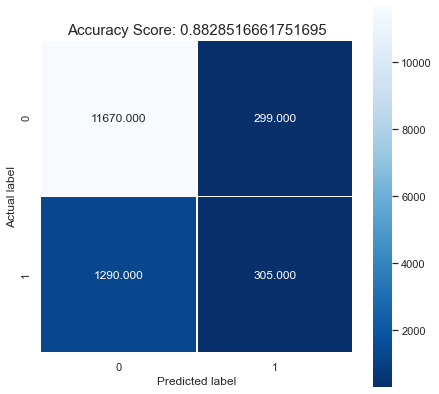

In [34]:
plt.figure(figsize=(7,7))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

### Confusion Matrix Evaluation Metrics

In [35]:
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))
print("Precision:",metrics.precision_score(Y_test, Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))

Accuracy: 0.8828516661751695
Precision: 0.5049668874172185
Recall: 0.19122257053291536


### ROC Curve
Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. It shows the tradeoff between sensitivity and specificity.

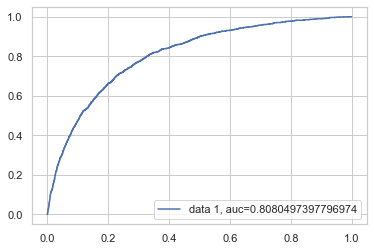

In [36]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  Y_pred_proba)
auc = metrics.roc_auc_score(Y_test, Y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, Y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [38]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, y_pred)
print(confusion_matrix)

[[11670   299]
 [ 1290   305]]


In [39]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11969
           1       0.50      0.19      0.28      1595

    accuracy                           0.88     13564
   macro avg       0.70      0.58      0.61     13564
weighted avg       0.85      0.88      0.86     13564



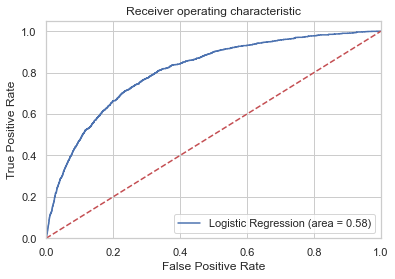

In [40]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(Y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

##### in case if we use knn 

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn=KNeighborsClassifier(metric='euclidean')
knn.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean')

In [44]:
pred=knn.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, pred)
print(confusion_matrix)

[[11451   518]
 [ 1163   432]]


In [48]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

              precision    recall  f1-score   support

           0       0.91      0.96      0.93     11969
           1       0.45      0.27      0.34      1595

    accuracy                           0.88     13564
   macro avg       0.68      0.61      0.64     13564
weighted avg       0.85      0.88      0.86     13564



In [49]:
print("Accuracy:",metrics.accuracy_score(Y_test, pred))
print("Precision:",metrics.precision_score(Y_test, pred))
print("Recall:",metrics.recall_score(Y_test, pred))

Accuracy: 0.8760690061928634
Precision: 0.45473684210526316
Recall: 0.270846394984326


In [50]:
knn.score(X_test,Y_test)

0.8760690061928634